<a href="https://colab.research.google.com/github/sabiqsabry/bawt/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import sys
sys.path.insert(0,'/content/drive/MyDrive/Colab Notebooks/bawt - chat behaviour analysis/')  # Needed to import package in parent dir, remove this if you pip installed the package
from soan.whatsapp import helper      # Helper to prepare the data
from soan.whatsapp import general     # General statistics
from soan.whatsapp import tf_idf      # To calculate TF-IDF
from soan.whatsapp import emoji       # To analyze emoji use
from soan.whatsapp import topic       # Topic modelling and summarization
from soan.whatsapp import sentiment   # Sentiment Analysis
from soan.whatsapp import wordcloud   # Create Word Clouds

from soan.colors   import colors      # Frequent Color Visualization

!pip install matplotlib==3.2.1
!pip install seaborn==0.10.1
!pip install Pillow==7.2.0
!pip install scipy==1.5.2
!pip install numpy==1.19.1
!pip install pandas==1.1.1
!pip install regex==2020.7.14
!pip install palettable==3.3.0
!pip install requests==2.22.0
!pip install scikit_learn==0.23.2
!pip install emoji==0.6.0
!pip install wordcloud==1.8.0
!pip install nltk==3.5
!pip install vaderSentiment==3.3.2

%matplotlib inline

%load_ext autoreload
%autoreload 2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in

In [10]:
df = helper.import_data('/content/drive/MyDrive/Colab Notebooks/bawt - chat behaviour analysis/chat/User 2/_chat 2.txt')
df = helper.preprocess_data(df)

# Change labels for anonymization - Leave this at False
if False:
    user_labels = {old: new for old, new in zip(sorted(df.User.unique()), ['User', 'Me'])}
    df.User = df.User.map(user_labels)

In [11]:
general.print_users(df)

#############
##  Users  ##
#############

ShuaibWork


In [12]:
user = "User"
language = "English"

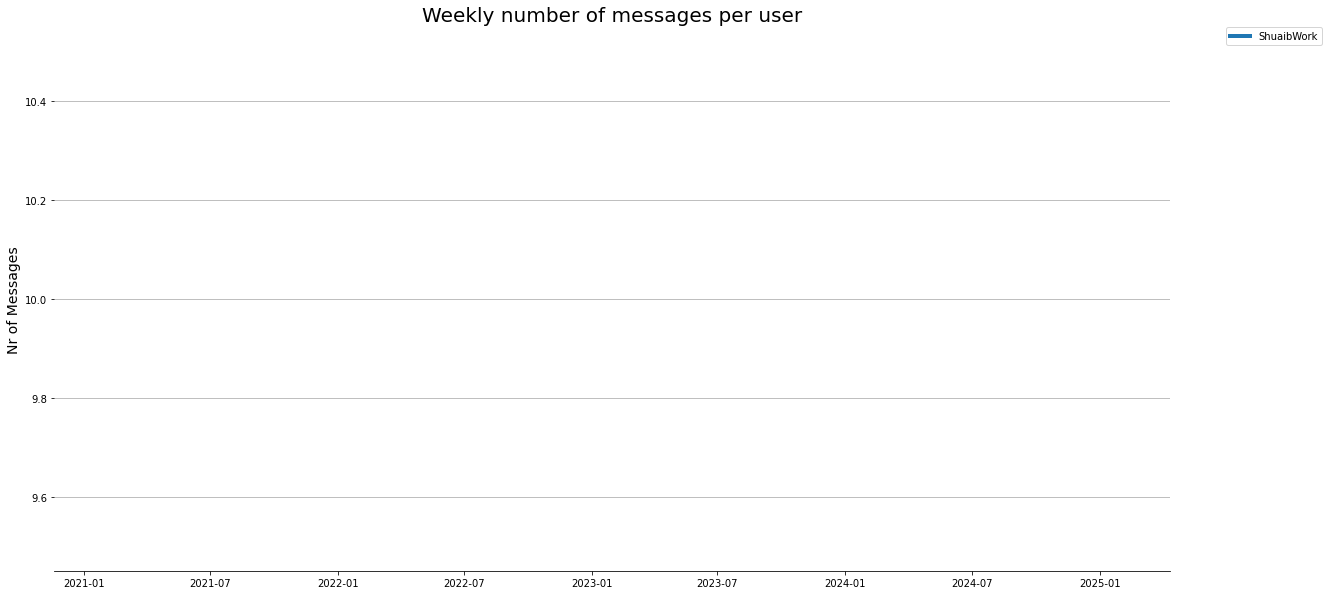

In [13]:
general.plot_messages(df, colors=None, trendline=False, savefig=False, dpi=100)

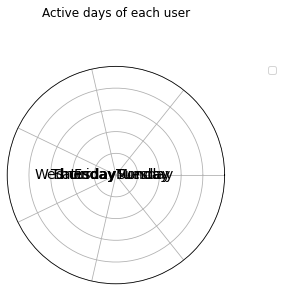

In [14]:
general.plot_day_spider(df, colors=None, savefig=False, dpi=100)

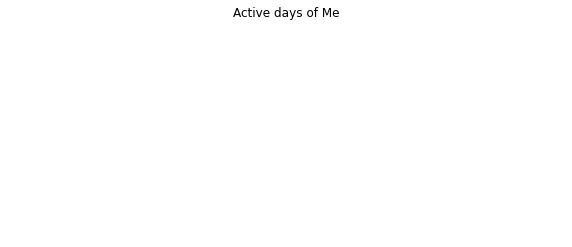

In [15]:
general.plot_active_days(df, savefig=False, dpi=100, user='Me')

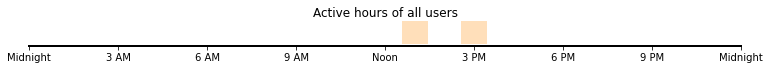

In [16]:
general.plot_active_hours(df, color='#ffdfba', savefig=False, dpi=100, user='All')

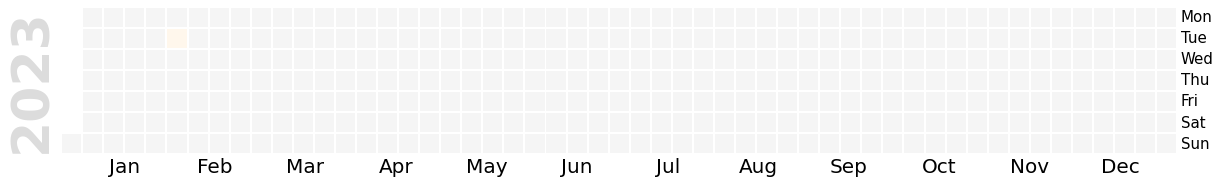

In [17]:
import pandas as pd
years = set(pd.DatetimeIndex(df.Date.values).year)

for year in years:
    general.calendar_plot(df, year=year, how='count', column='index')

In [19]:
general.print_timing(df)

#####################################
##  Avg. Response Time in Minutes  ##
#####################################

ShuaibWork:                   0.0

##############################
##  Nr. Initiated Messages  ##
##############################



In [21]:
counts = tf_idf.count_words_per_user(df, sentence_column="Message_Only_Text", user_column="User")
counts = tf_idf.remove_stopwords(counts, language='english', column="Word")

In [22]:
unique_words = tf_idf.get_unique_words(counts, df, version = 'C')

In [23]:
tf_idf.print_users(df)

#############
##  Users  ##
#############

ShuaibWork
